# ML modeles summarize
Conny Lin | June 22, 2020

## set up

### local computer

In [1]:
# import local libraries using host specific paths
import socket, sys, time, datetime, os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# get paths for local computer
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'

# import local variables
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
from brainstation_capstone.ml.toolbox.mlSOP import ModelEvaluation
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
data_dir = os.path.join(localpaths['Capstone'], 'data')

# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')# import local libraries using host specific paths

getting host computer specific paths
last ran on: 2020-06-22 14:56:47.029038 PT


## download and check all models are intact

In [3]:

# list 9 machine learning models
ML_MODELS = ['MLPClassifierSDG', 'MLPClassifierADAM', 'GradientBoostingClassifier', 'RandomForestClassifier', 'BaggingClassifier', 'LogisticRegression','RidgeClassifier','DecisionTreeClassifier', 'SVC']

In [160]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    if not os.path.isfile(ml_model_path):
       print(f'can not find {model_name}')
print('complete checking')

complete checking


In [165]:
for model_name in ML_MODELS:
    ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                        model_name+'_eval.pickle')
    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    print(f'\n{model_name}')
    print(f'\t{model_eval_obj.model.get_params()}')
print('\ncomplete checking')


MLPClassifierSDG
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'sgd', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

MLPClassifierADAM
	{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': 150, 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 100, 'momentum': 0.8, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 1e-05, 'random_state': 318, 'shuffle': True, 'solver': 'adam', 'tol': 1e-08, 'validation_fraction': 0.1, 'verbose': 1, 'warm_start': False}

Gra

In [ ]:
# update data dir to local machine
for model_name in ML_MODELS:
    print(f'update data dir to local {model_name}', end='/r')
    ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                        model_name+'_eval.pickle')

    model_eval_obj = pickle.load(open(ml_model_path,'rb'))
    print(f'\n{model_name}')
    print(f'\t{model_eval_obj.model.get_params()}')
print('\ncomplete checking')

# Logistic Regression 

In [ ]:
ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                    'LogisticRegression_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
model = model_eval_obj.model

In [155]:
print('LogisticRegression attributes:')
print(f'\tintercept: {model.intercept_}')
print(f'\tclasses: {model.classes_}')
print(f'\tn_iter: {model.n_iter_}')
print(f'\tmodel: {model}')

LogisticRegression attributes:
	intercept: [-0.08135427]
	classes: [0. 1.]
	n_iter: [46]
	model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=318, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


## Logistic Regression top features

In [53]:
# get column names
from brainstation_capstone.etl.datatransform import Nutcracker
nutcracker = Nutcracker()
X_columns = nutcracker.names['X']
len(X_columns)
# take a look at predictive value of each parameter
coef_df = pd.DataFrame(model.coef_[0], columns=['coef'], index=X_columns)
coef_df['coef_abs'] = np.absolute(coef_df['coef'].values)
coef_df.sort_values(by='coef_abs', ascending=False)


,coef,coef_abs
width,-3.151507,3.151507
relwidth,2.731500,2.731500
curve,-2.101670,2.101670
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349


Top features are width, realwidth, and then curve, but previously thought it's curve.


take a look at negative and positive predictors

In [54]:
print('positive predctors')
coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False)


positive predctors


,coef,coef_abs
relwidth,2.731500,2.731500
midline,1.161986,1.161986
kink,0.690345,0.690345
morphwidth,0.597707,0.597707
persistence,0.235085,0.235085
angular,0.187394,0.187394
time,0.128537,0.128537
speed,0.111658,0.111658
length,0.083046,0.083046
aspect,0.077678,0.077678


In [55]:
print('negative predctors')
coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False)

negative predctors


,coef,coef_abs
width,-3.151507,3.151507
curve,-2.101670,2.101670
area,-0.517751,0.517751
rellength,-0.428565,0.428565
relaspect,-0.356466,0.356466
bias,-0.252349,0.252349
orient,-0.105091,0.105091
vel_y,-0.009493,0.009493
vel_x,-0.007048,0.007048


In [56]:
# get means of each group to compare
data = nutcracker.loaddata()
data.head()


,etoh,id,mwtid,time,frame,persistence,area,midline,morphwidth,width,...,kink,curve,speed,angular,bias,dir,vel_x,vel_y,orient,crab
0,0,325.0,5562.0,30.660,211.0,29.4,0.121014,0.9811,0.1023,0.2106,...,46.3,29.3,0.1956,23.9,1.0,0.0,-0.1828,-0.0694,15.4,0.0185
1,0,29.0,605.0,14.027,229.0,17.9,0.242028,1.3200,0.1689,0.4671,...,61.9,30.8,0.3136,2.7,1.0,0.0,0.0105,-0.3134,92.2,0.0016
2,0,118.0,725.0,69.963,1727.0,238.8,0.184437,1.2996,0.1221,0.2052,...,14.3,21.7,0.2837,2.0,1.0,0.0,-0.2822,-0.0294,-173.1,0.0045
3,0,537.0,4288.0,37.299,436.0,26.4,0.044469,0.5986,0.0548,0.1377,...,20.0,26.5,0.1934,17.8,1.0,0.0,-0.1910,0.0299,168.5,0.0089
4,0,209.0,4301.0,33.371,227.0,23.7,0.172044,1.2023,0.1316,0.3915,...,44.6,27.2,0.1128,1.9,1.0,0.0,0.1125,-0.0083,6.4,0.0207


In [57]:
data_mean_by_etoh = data.groupby('etoh').agg('mean').transpose()
data_mean_by_etoh['etoh_diff'] = data_mean_by_etoh.iloc[:,1] - data_mean_by_etoh.iloc[:,0]
# get etoh diff
etoh_diff = data_mean_by_etoh.loc[coef_df.index.values,'etoh_diff']
# merge to coef_df
coef_df = coef_df.join(etoh_diff)


In [59]:
#
print('positive predctors')
display(coef_df.loc[coef_df['coef'] > 0].sort_values(by=['coef_abs'], ascending=False))
print('negative predctors')
display(coef_df.loc[coef_df['coef'] < 0].sort_values(by=['coef_abs'], ascending=False))

positive predctors


,coef,coef_abs,etoh_diff
relwidth,2.731500,2.731500,-0.017748
midline,1.161986,1.161986,0.000313
kink,0.690345,0.690345,-10.470617
morphwidth,0.597707,0.597707,-0.005508
persistence,0.235085,0.235085,4.230275
angular,0.187394,0.187394,-2.862369
time,0.128537,0.128537,1.278580
speed,0.111658,0.111658,-0.023827
length,0.083046,0.083046,0.065057
aspect,0.077678,0.077678,-0.087956


negative predctors


,coef,coef_abs,etoh_diff
width,-3.151507,3.151507,-0.069808
curve,-2.101670,2.101670,-12.158920
area,-0.517751,0.517751,-0.006259
rellength,-0.428565,0.428565,-0.001260
relaspect,-0.356466,0.356466,-0.017540
bias,-0.252349,0.252349,-0.051480
orient,-0.105091,0.105091,-2.909403
vel_y,-0.009493,0.009493,0.000347
vel_x,-0.007048,0.007048,0.000657


Mean does not give you the right measure. Machine learning predictions does not correlates with mean differences.

Calculate significance of each values + p values


In [61]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm



In [117]:
anova_lm_result

,df,sum_sq,mean_sq,F,PR(>F)
etoh,1.0,15.886795,15.886795,45791.474343,0.0
Residual,1999998.0,693.874997,0.000347,NaN,NaN


In [120]:
coef_df['pvalue_anova'] = np.empty(coef_df.shape[0])
coef_df['F'] = np.empty(coef_df.shape[0])
for feature in coef_df.index.values:
    data_lm = ols(f'{feature} ~ etoh', data=data).fit()
    anova_lm_result = anova_lm(data_lm)
    coef_df.loc[feature, 'pvalue_anova'] = anova_lm_result.loc['etoh','PR(>F)']
    coef_df.loc[feature, 'F'] = anova_lm_result.loc['etoh','F']
coef_df

,coef,coef_abs,etoh_diff,pvalue_anova,F
time,0.128537,0.128537,1.278580,3.714041e-262,1.196748e+03
persistence,0.235085,0.235085,4.230275,4.190496e-249,1.136656e+03
area,-0.517751,0.517751,-0.006259,0.000000e+00,1.108624e+04
midline,1.161986,1.161986,0.000313,2.532094e-01,1.305509e+00
morphwidth,0.597707,0.597707,-0.005508,0.000000e+00,1.624879e+04
width,-3.151507,3.151507,-0.069808,0.000000e+00,3.356777e+05
relwidth,2.731500,2.731500,-0.017748,0.000000e+00,1.610303e+03
length,0.083046,0.083046,0.065057,0.000000e+00,5.246570e+04
rellength,-0.428565,0.428565,-0.001260,8.150887e-15,6.029944e+01
aspect,0.077678,0.077678,-0.087956,0.000000e+00,2.791515e+05


If logistic regression model coef strength is correlated with p value significance strength, we would expect the higher the coef, the lower the p value (negative relationship).

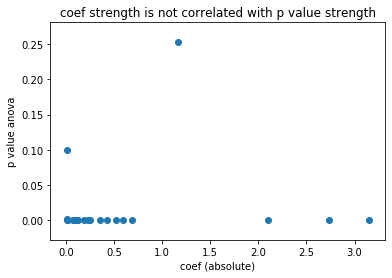

In [84]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef_abs'], coef_df['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

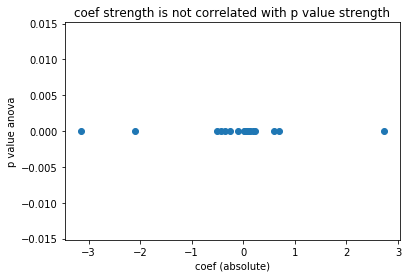

In [122]:
# take out outlier to see the lower values
coef_df_trim = coef_df.loc[coef_df['pvalue_anova'] < 0.000005,:].copy()
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df_trim['coef_abs'], coef_df_trim['pvalue_anova'])
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef strength is not correlated with p value strength')
plt.show()

In [121]:
# export the df table for graphing in excel
coef_df.to_csv(os.path.join(data_dir, 'table_LogisticRegression_coef_anova_p.csv'))

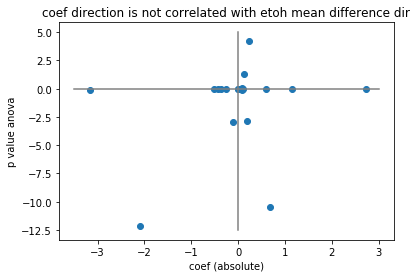

In [128]:
# correlation bewteen pvalue and coef abs
plt.figure()
plt.scatter(coef_df['coef'], coef_df['etoh_diff'])
plt.plot([-3.5, 3], [0, 0], color='gray')
plt.plot([0, 0],[-12.5, 5], color='gray')
plt.xlabel('coef (absolute)')
plt.ylabel('p value anova')
plt.title('coef direction is not correlated with etoh mean difference dir')
plt.show()

In [131]:
# plot standardized values and error bar
# get transformed data
nutcracker.mldata(feature_reduction='None')


None
None


(array([[-0.19370346, -0.01968672,  0.18197568, ...,  0.16403668,
         -0.3220815 , -0.79509773],
        [-0.0034903 ,  0.5302525 , -0.70344521, ...,  0.72855647,
          1.49370758, -0.33931424],
        [ 1.53550704,  1.31071137,  0.85580702, ..., -0.15912074,
         -0.01956178, -0.42411116],
        ...,
        [-0.29745609,  0.02476325, -0.28026611, ..., -1.0159572 ,
          0.23264978, -0.60960445],
        [ 0.74007021,  0.8780994 , -0.07844223, ...,  2.13315146,
          1.08386379,  0.41855831],
        [ 0.25589127,  0.83985175, -0.17284372, ..., -0.04648496,
          1.44608252, -0.81629696]]),
 array([[ 0.91299126, -0.05741751,  1.04135479, ...,  0.4322171 ,
          0.35137703, -0.72090041],
        [ 0.3596439 ,  1.08484347,  0.03874583, ...,  1.61087008,
         -0.38580517,  1.08633412],
        [ 0.58444127,  1.34223984,  0.28288762, ...,  0.6527955 ,
         -1.01029709,  0.74714641],
        ...,
        [-0.47037714, -0.61510964, -0.57323625, ...,  

In [154]:
# use X_test_scaled set to proof
X_train = pd.DataFrame(nutcracker.X_train_scaled, columns=nutcracker.names['X'])
X_train['etoh'] = nutcracker.y_train
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   area        1600000 non-null  float64
 1   midline     1600000 non-null  float64
 2   morphwidth  1600000 non-null  float64
 3   width       1600000 non-null  float64
 4   relwidth    1600000 non-null  float64
 5   length      1600000 non-null  float64
 6   rellength   1600000 non-null  float64
 7   aspect      1600000 non-null  float64
 8   relaspect   1600000 non-null  float64
 9   kink        1600000 non-null  float64
 10  curve       1600000 non-null  float64
 11  speed       1600000 non-null  float64
 12  angular     1600000 non-null  float64
 13  bias        1600000 non-null  float64
 14  dir         1600000 non-null  float64
 15  vel_x       1600000 non-null  float64
 16  vel_y       1600000 non-null  float64
 17  crab        1600000 non-null  float64
 18  etoh        1600000 no

In [166]:
# TODO: do anova on scaled data


# get predictions compare which ones are mistaken by which model


In [6]:
# get predictions from each model
# for model_name in ML_MODELS:
model_name = ML_MODELS[5]
print(f'\n{model_name}')
ml_model_path = os.path.join(data_dir, 'ml_eval_results', 
                model_name+'_eval.pickle')
model_eval_obj = pickle.load(open(ml_model_path,'rb'))
y_predict = model_eval_obj.predict()
y_predict


LogisticRegression
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3
loading completed
timer starts
total time: 0.000 min


array([1., 0., 0., ..., 0., 0., 0.])

In [7]:
len(y_predict)

400000

## see which worms are not predicted right, get their videos